# Quantum states in Graphiq

## Overview
In Graphiq, quantum states are represented as a `QuantumState` object. 
This object contains one or more state representations -- density matrix representations; in the future, this class is also expected to mediate conversions between different state representations.

Our quantum states have 3 currently planned representations:
1. **Density matrix:** full representation of a quantum state, matrix size scales exponentially with number of qubits.
2. **Stabilizer:** representation of quantum states using the stabilizer formalism, which restricts what states can be modelled, but circuit simulation runtime is polynomial in the number of qubits.
3. **Graph:** graph-based representation of quantum states, restricted to so-called "graph states". This representation is more restrictive than the stabilizer, but enables the use of graph-theoretic tools.

## Density matrix 

Internally, the density matrix is represented by a numpy array. Additionally, the class contains helper functions which allows us to apply quantum operations (e.g. unitary gates, measurements) or noise to our system without manually modifying the numpy array.

### Initializing `DensityMatrix` state representation

Most often, the only direct state manipulation a user will have to perform is the initialization of their ideal state (the remaining state manipulation occurs during the compilation/simulation of the circuit, which is done automatically).

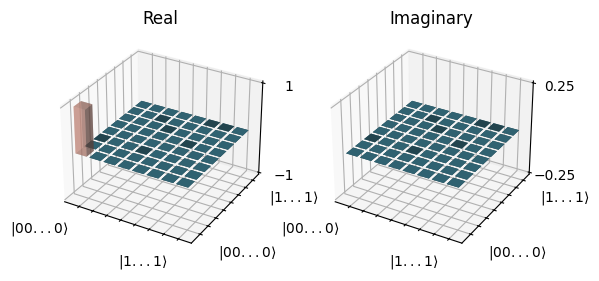

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [4]:
""" Initializing a density matrix of size n, with every qubit in state |0> """

from graphiq.backends.density_matrix.state import DensityMatrix

n = 3
dm_state = DensityMatrix(n)

# print and visualize density matrix
dm_state.draw()
print(dm_state.data)

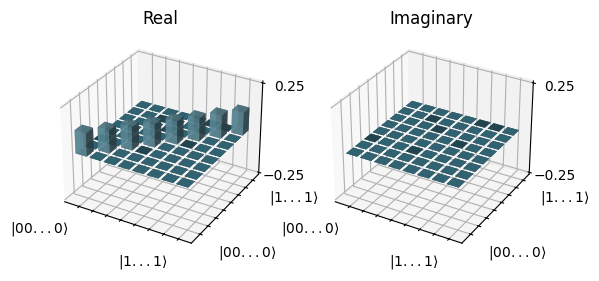

[[0.125 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.125 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.125 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.125 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.125 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.125 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.125 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.125]]


In [6]:
""" Initializing a density matrix from a numpy array """

# We can initialize it from any defined numpy array of adequate dimensions
import numpy as np

n = 3
data = np.eye(2**n)  # this generates an identity matrix for an n-qubit state
dm_state = DensityMatrix(data)

dm_state.draw()
print(dm_state.data)

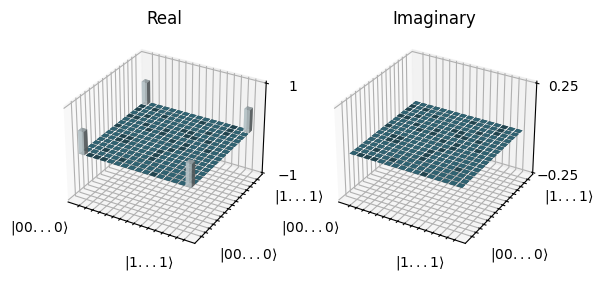

[[0.125 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.125 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.125 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.125 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.125 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.125 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.125 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.125]]


In [8]:
""" Initializing a state with density matrix helper functions """

# Helper functions for density matrix operations
import graphiq.backends.density_matrix.functions as dmf

# 4-qubit GHZ state: |phi> = 1/sqrt(2) * (|0000> + |1111>)
ghz4_dm = dmf.ket2dm(
    (dmf.tensor(4 * [dmf.state_ketz0()]) + dmf.tensor(4 * [dmf.state_ketz1()]))
    / np.sqrt(2)
)

ghz4_state = DensityMatrix(ghz4_dm)
ghz4_state.draw()
print(dm_state.data)

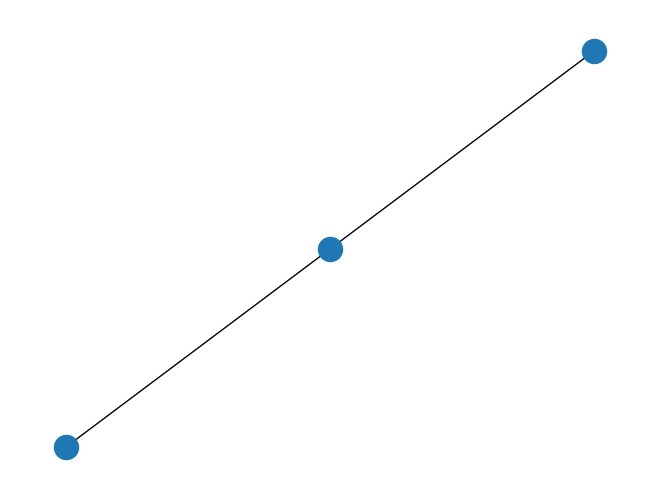

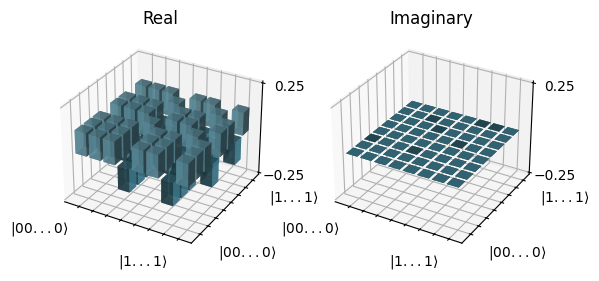

[[ 0.125  0.125  0.125 -0.125  0.125  0.125 -0.125  0.125]
 [ 0.125  0.125  0.125 -0.125  0.125  0.125 -0.125  0.125]
 [ 0.125  0.125  0.125 -0.125  0.125  0.125 -0.125  0.125]
 [-0.125 -0.125 -0.125  0.125 -0.125 -0.125  0.125 -0.125]
 [ 0.125  0.125  0.125 -0.125  0.125  0.125 -0.125  0.125]
 [ 0.125  0.125  0.125 -0.125  0.125  0.125 -0.125  0.125]
 [-0.125 -0.125 -0.125  0.125 -0.125 -0.125  0.125 -0.125]
 [ 0.125  0.125  0.125 -0.125  0.125  0.125 -0.125  0.125]]


In [10]:
""" 
Defining a target state as a graph and converting to a density matrix
"""

import networkx as nx

cluster_state = nx.Graph([(1, 2), (2, 3)])  # add graph edges between node 1-2, node 2-3 -- a linear chain
nx.draw(cluster_state)

dm = DensityMatrix.from_graph(cluster_state)
dm.draw()
print(dm.data)

### Density matrix functions

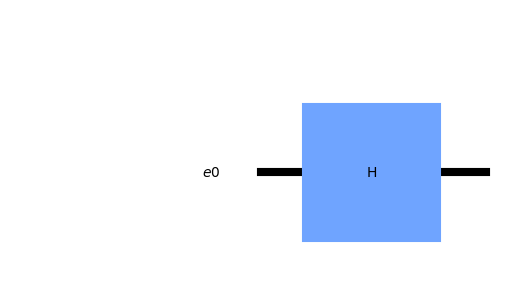

In [14]:
""" Apply a unitary transformation """

# Suppose that we want to simulate the following circuit: a single qubit, a single gate
from graphiq.circuit.circuit_dag import CircuitDAG
from graphiq.circuit.ops import Hadamard

c = CircuitDAG()
c.add(Hadamard(register=0, reg_type="e"))
c.draw_circuit();

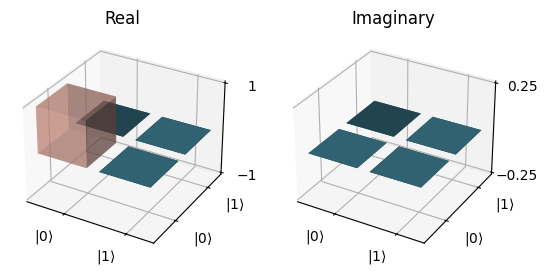

In [15]:
# Before any gates are applied, the density matrix data are the default values when the DensityMatrix is initialized by an integer n
n = 1

dm_state = DensityMatrix(n)
dm_state.draw();

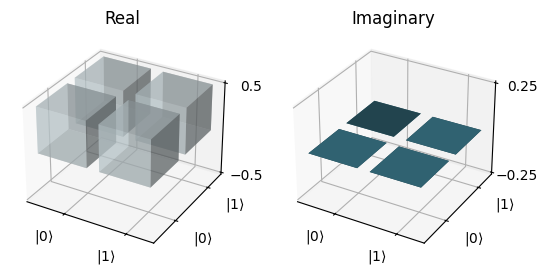

In [16]:
# We can get gates from the density matrix helper functions
#
h_gate = dmf.get_one_qubit_gate(
    n,  # number of total qubits in the state
    0,  # index of the density matrix which represents the target qubit
    dmf.hadamard(),  # the single-qubit state version of the gate we want to apply
)
dm_state.apply_unitary(h_gate)
dm_state.draw();

Measurement outcome: 1


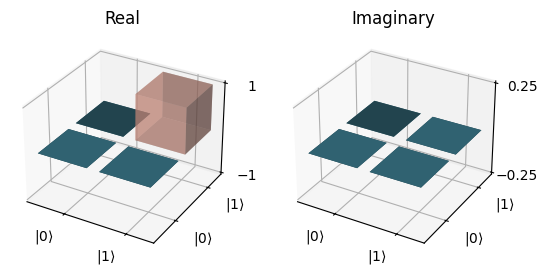

In [18]:
""" Measure a qubit (projects the qubit onto a given basis--we will focus on the computational basis Z)"""

# We measure qubit to convert the (inaccessible to us) quantum information to classical information
projectors = dmf.projectors_zbasis(n, 0)  # this is the basis on which we project
outcome = dm_state.apply_measurement(
    projectors,  # the projector
    measurement_determinism="probabilistic"  # most quantum measurements are inherently probabilistic,
    # but we allow deterministic measurements for algorithmic reasons
)
print(f"Measurement outcome: {outcome}")
dm_state.draw();

## Stabilizer representation

An $n$-qubit stabilizer state is represented with 4 tableaus (a binary matrix):
- Destabilizer: $n$ vector
- Stabilizer: $n$ vector
- phase: $2n$ vector
- $i$ phase: $2n$ vector

In [19]:
""" Initializing a stabilizer of size n, with every qubit in state |0> """

from graphiq.backends.stabilizer.state import Stabilizer

n = 3
stabilizer_state = Stabilizer(n)
print(stabilizer_state)

Destabilizers: 
['XII', 'IXI', 'IIX']
 Stabilizer: 
 ['ZII', 'IZI', 'IIZ'] 
 Phase: 
 [0 0 0 0 0 0]
 i phase: 
 [0 0 0 0 0 0]


In [20]:
""" Initializing a stabilizer from a Clifford Tableau """

from graphiq.backends.stabilizer.clifford_tableau import CliffordTableau

n = 3
tableau = CliffordTableau(n)

stabilizer_state = Stabilizer(tableau)
print(stabilizer_state)

Destabilizers: 
['XII', 'IXI', 'IIX']
 Stabilizer: 
 ['ZII', 'IZI', 'IIZ'] 
 Phase: 
 [0 0 0 0 0 0]
 i phase: 
 [0 0 0 0 0 0]


Destabilizers: 
['ZII', 'IZI', 'IIZ']
 Stabilizer: 
 ['XZI', 'ZXZ', 'IZX'] 
 Phase: 
 [0 0 0 0 0 0]
 i phase: 
 [0 0 0 0 0 0]


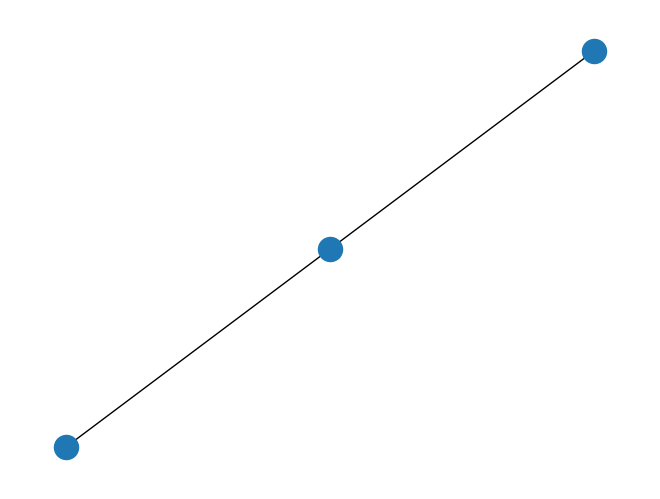

In [21]:
""" 
Defining a target state from a graph by converting the target graph to a stabilizer
"""

import networkx as nx
from graphiq.backends.stabilizer.functions.rep_conversion import (
    get_clifford_tableau_from_graph,
)

cluster_state = nx.Graph([(1, 2), (2, 3)])  # Edge between node 1-2, node 2-3
nx.draw(cluster_state)

linear_cluster_3_stabilizer_state = get_clifford_tableau_from_graph(
    cluster_state
)
print(linear_cluster_3_stabilizer_state)

### Stabilizer functions

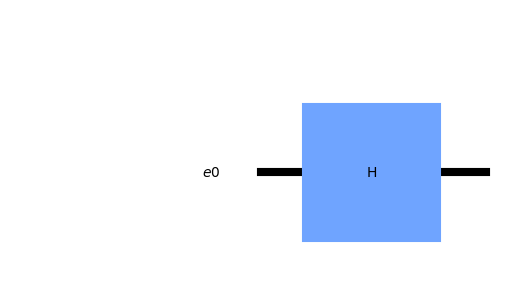

In [24]:
from graphiq.circuit.circuit_dag import CircuitDAG
from graphiq.circuit.ops import Hadamard

c = CircuitDAG()
c.add(Hadamard(register=0, reg_type="e"))
c.draw_circuit();

In [25]:
# initial state
n = 1

stabilizer_state = Stabilizer(n)
print(stabilizer_state)

## Apply a unitary transformation and measurement
stabilizer_state = Stabilizer(1)
stabilizer_state.apply_hadamard(0)

print(stabilizer_state)

Destabilizers: 
['X']
 Stabilizer: 
 ['Z'] 
 Phase: 
 [0 0]
 i phase: 
 [0 0]
Destabilizers: 
['Z']
 Stabilizer: 
 ['X'] 
 Phase: 
 [0 0]
 i phase: 
 [0 0]


In [26]:
from graphiq.backends.stabilizer.functions.clifford import measure_z

# Apply measurement on z basis
# By default the measurement determinism is probabilistic
outcome = measure_z(
    stabilizer_state.tableau, 0, measurement_determinism="probabilistic"
)
print(f"Measurement outcome: {outcome}")

Outcome of the measurement: 1


## Graph state representation [in development]

## Unified interface: `QuantumState` objects
The `QuantumState` object wraps different state formalisms/representations into one object, and provides a simple interface to define, manipulate, and visualize the state across representations.

In [27]:
""" Initializing a single representation """
from graphiq.state import QuantumState

n = 2
data = np.eye(2**n)

state = QuantumState(
    data,  # initialization data
    rep_type="dm",  # can also be 'g' for graph or 's' for stabilizer
)

print(state.rep_data.data)

[[0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]]


## Conversion between state representations

Not all representations can be converted to one another without loss of information.
* The `Graph` representation can represent only a class of quantum states called graph states, and is the least general. 
* The `Stabilizer` representation is more general, and can represent any "pure states" (there are no unknowns associated with classical probabilities).
* The `DensityMatrix` representation is most general of all, and can represent both pure states and mixed states.

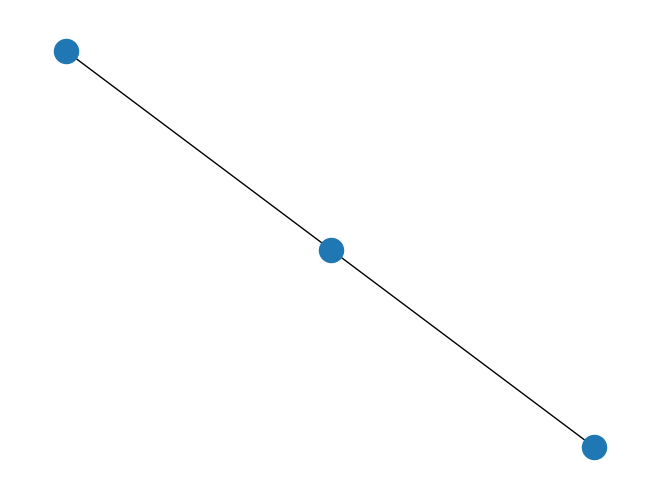

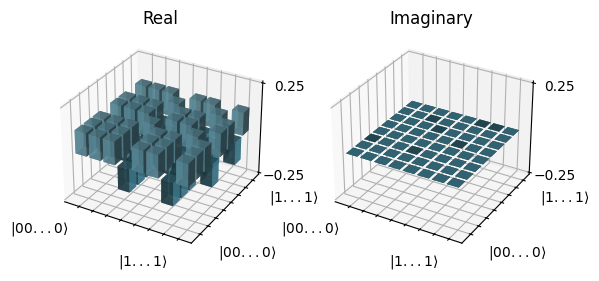

In [50]:
""" Graph to density matrix"""
from graphiq.backends.state_rep_conversion import density_to_graph, graph_to_density, graph_to_stabilizer, stabilizer_to_graph, stabilizer_to_density, density_to_stabilizer
import graphiq.visualizers.density_matrix as vdm

linear3_g = nx.Graph([(1, 2), (2, 3)])  # Edge between node 1-2, node 2-3
linear3_dm = graph_to_density(linear3_g)

nx.draw(linear3_g)
vdm.density_matrix_bars(linear3_dm);

[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]


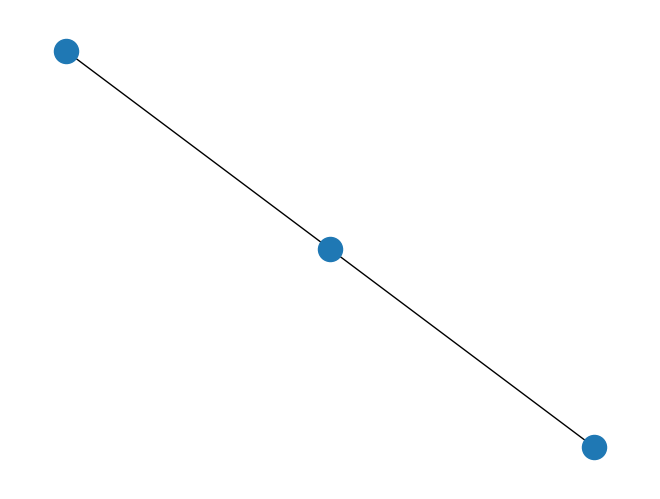

In [34]:
""" Density matrix to graph: exact """

# we know that linear3_dm is a graph state--we can convert it back to a graph
graph_list = density_to_graph(linear3_dm, threshold=0.4999)

# as linear3_dm is a pure state, the graph_list should contain only one element
linear3_graph_from_dm = nx.from_numpy_array(graph_list)
nx.draw(linear3_graph_from_dm);

In [49]:
""" Graph to stabilizer and back """
linear3_stabilizer = graph_to_stabilizer(linear3_g)
print(linear3_stabilizer)
stabilizer_to_graph(linear3_stabilizer)

[(1.0, <graphiq.backends.stabilizer.tableau.StabilizerTableau object at 0x13527dbb0>)]


[(1.0, <networkx.classes.graph.Graph at 0x13509c130>)]

In [54]:
""" Stabilizer to density and back """
linear3_dm_from_stabilizer = stabilizer_to_density(linear3_stabilizer)
print(linear3_dm_from_stabilizer)
# vdm.density_matrix_bars(linear3_dm_from_stabilizer.data)
# linear3_stabilizer_from_dm = density_to_stabilizer(linear3_dm_from_stabilizer)
# print(linear3_stabilizer_from_dm)

None
